In [101]:
import numpy as np
import sympy as sym
import intervalpy as ival
import itertools as it
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.patches import Rectangle

%matplotlib inline

In [102]:
def symbolic_3rpr_func(x_c, y_c):
    v = sym.symbols('v1, v2, v3')
    u = sym.symbols('u1, u2')
    f = sym.Matrix([[-v[0] ** 2 + (u[0] - x_c[0]) ** 2 + (u[1] - y_c[0]) ** 2],
                    [-v[1] ** 2 + (u[0] - x_c[1]) ** 2 + (u[1] - y_c[1]) ** 2],
                    [-v[2] ** 2 + (u[0] - x_c[2]) ** 2 + (u[1] - y_c[2]) ** 2]])
    return f, u, v

In [103]:
def derive_matrix(f, x):
    """
    Function for calculating partial derivative of matrix g
    :param f : array to be derived
    :param x : variables for derivative
    :return gv: derived matrix
    """
    g_v_all = []
    for i in range(len(x)):
        g_v_all.append(sym.diff(f, x[i]))  # Calculate derivative of G with respect to v
    gv = sym.Matrix()
    for i in range(len(g_v_all)):
        gv = sym.Matrix([gv, g_v_all[i]])
    gv = gv.reshape(f.shape[0], len(x)).T
    return gv

In [104]:
def make_boxes_list(grid, dim, uniform=True):
        """
        Make list of boxes in dim dimension from vector grid
        :param grid: vector on which grid is constructed
        :param dim:  the dimensional of grid
        :return: the list of boxes in dim
        """
        if uniform == True:
            grid_size = len(grid) - 1
            grid_intervals = []
            grid_variants = []
            for i in range(grid_size):
                grid_intervals.append(ival.Interval([grid[i], grid[i + 1]]))
            for i in range(dim):
                grid_variants.append(grid_intervals)
            grid_n_size = list(it.product(*grid_variants))
        else:
            grid_variants = []
            grid_numbers = np.shape(grid)[0]
            for i in range(grid_numbers):
                grid_intervals = []
                one_grid = grid[i]
                grid_size = len(one_grid) - 1
                for j in range(grid_size):
                    grid_intervals.append(ival.Interval([one_grid[j], one_grid[j + 1]]))
                grid_variants.append(grid_intervals)
            grid_n_size = list(it.product(*grid_variants))
        return grid_n_size

In [105]:
def plot_area_3RPR(ax, x_c, y_c):
    for i in range(3):
        circle = plt.Circle((x_c[i], y_c[i]), radius=12, fc='y', fill=False)
        circle1 = plt.Circle((x_c[i], y_c[i]), radius=27, fc='y', fill=False)
        ax.add_patch(circle)
        ax.add_patch(circle1)
    ax.grid()

In [106]:
def uni_plotter(area_points, border_points, ini_box=None, title="", ax=0, size=0, outside_boxes=None, legend=False, 
                logger=0, plot_area=None, pa_params=None):
    """
    Function for plotting boxes of different types
    :param area_points: array of inside boxes of shape (n, 2*size)
    :param border_points: array of inside boxes of shape (m, 2*size)
    :param ini_box: the initial box, the array of shape (size, 2)
    :param title: the title for the plot, string
    :param ax: the axes object
    :param size: the dimensional of the output space, int
    :param outside_boxes: array of outside boxes of shape (k, 2*size)
    :return:
    """
    plt.rcParams.update({'font.size': 18})
    handles = []
    if size == 1:
        if ax == 0:
            fig, ax = plt.subplots(figsize=(14, 2))
        if ini_box:
            ini_legend = mlines.Line2D([], [], color='blue', label='Initial interval')
            handles.append(ini_legend)
            x_lim = ini_box
            x_min, x_max = x_lim[0] - abs(x_lim[0]) / 10, x_lim[1] + abs(x_lim[1]) / 10
            ax.set_xlim([x_min, x_max])
            ax.set_ylim([-1, 1])
            ax.plot([x_lim[0], x_lim[1]], [0, 0], linewidth = 12, alpha = 0.4, c = "blue")
        for i in range(len(area_points)):
            ax.plot([area_points[i][0][0], area_points[i][0][1]],[0, 0], marker = "|", color = "green")
        for i in range(len(border_points)):
            ax.plot([border_points[i][0][0], border_points[i][0][1]],[0, 0], marker = "|", color = "yellow")
        if np.any(outside_boxes):
            outside_legend = mlines.Line2D([], [], color='black', label='Outside intervals')
            handles.append(outside_legend)
            for i in range(len(outside_boxes)):
                ax.plot([outside_boxes[i][0][0], outside_boxes[i][0][1]],[0, 0], marker = "|", color = "black")
        inside_legend = mlines.Line2D([], [], color='green', label='Inside intervals')
        border_legend = mlines.Line2D([], [], color='yellow', label='Border intervals')
        handles.append(inside_legend)
        handles.append(border_legend)
    elif size == 2:
        if ax == 0:
            fig, ax = plt.subplots(figsize=(12, 6))
        if ini_box:

            x_lim = ini_box[0]
            y_lim = ini_box[1]
            x_min, y_min, x_max, y_max = x_lim[0] - abs(x_lim[0]) / 10, y_lim[0] - abs(y_lim[0]) / 10, \
                                         x_lim[1] + abs(x_lim[1]) / 10, y_lim[1] + abs(y_lim[1]) / 10
            ax.set_ylim([y_min, y_max])
            ax.set_xlim([x_min, x_max])
            rect1 = Rectangle((x_lim[0], y_lim[0]), x_lim[1] - x_lim[0], y_lim[1] - y_lim[0], fill=False, color='red',
                              linewidth=2.0)
            ax.add_patch(rect1)
            ini_legend = mlines.Line2D([], [], color='red', label='Initial box')
            handles.append(ini_legend)
        ax.axes.set_aspect('equal')
        for i in range(len(area_points)):  # Plot rectangles, which compose workspace area
            rect1 = Rectangle((area_points[i][0][0], area_points[i][1][0]),
                              area_points[i][0][1] - area_points[i][0][0],
                              area_points[i][1][1] - area_points[i][1][0],
                              fill=True, fc='green', color='black', linewidth=0.5, alpha=0.8)
            ax.add_patch(rect1)
        for i in range(len(border_points)):  # Plot rectangles, which compose the border of workspace area
            rect1 = Rectangle((border_points[i][0][0], border_points[i][1][0]),
                              border_points[i][0][1] - border_points[i][0][0],
                              border_points[i][1][1] - border_points[i][1][0],
                              fill=True, fc='yellow', color='black', linewidth=0.5, alpha=0.8)
            ax.add_patch(rect1)
        if np.any(outside_boxes):
            outside_legend = mpatches.Patch(color='black', label='Outside boxes')
            handles.append(outside_legend)
            for i in range(len(outside_boxes)):  # Plot rectangles, which compose the border of workspace area
                rect1 = Rectangle((outside_boxes[i][0][0], outside_boxes[i][1][0]),
                                  outside_boxes[i][0][1] - outside_boxes[i][0][0],
                                  outside_boxes[i][1][1] - outside_boxes[i][1][0],
                                  fill=True, fc='black', color='black', linewidth=0.5, alpha=0.8)
                ax.add_patch(rect1)
        inside_legend = mpatches.Patch(color='green', label='Inside boxes')
        border_legend = mpatches.Patch(color='yellow', label='Border boxes')
        handles.append(inside_legend)
        handles.append(border_legend)
    else:
        if ax == 0:
            fig = plt.figure(figsize=(8, 8))
            ax = fig.add_subplot(111, projection='3d')
        if ini_box:
            x_lim = ini_box[0]
            y_lim = ini_box[1]
            z_lim = ini_box[2]
            x_min, y_min, z_min, x_max, y_max, z_max = x_lim[0] - abs(x_lim[0]) / 10, y_lim[0] - abs(y_lim[0]) / 10, z_lim[0] - abs(z_lim[0]) / 10,\
                                         x_lim[1] + abs(x_lim[1]) / 10, y_lim[1] + abs(y_lim[1]) / 10,  z_lim[1] + abs(z_lim[1]) / 10
            ax.set_ylim([y_min, y_max])
            ax.set_xlim([x_min, x_max])
            ax.set_zlim([z_min, z_max])
            plot_linear_cube(ax, x_min, y_min, z_min, abs(x_max - x_min), abs(y_max - y_min), abs(z_max - z_min), color="red")
            ini_legend = mlines.Line2D([], [], color='red', label='Initial box')
            handles.append(ini_legend)
        for i in range(len(area_points)):
            plot_linear_cube(ax, area_points[i][0][0], area_points[i][1][0], area_points[i][2][0],
                             area_points[i][0][1] - area_points[i][0][0], area_points[i][1][1] - area_points[i][1][0],
                             area_points[i][2][1] - area_points[i][2][0], color="green")
        for i in range(len(border_points)):
            plot_linear_cube(ax, border_points[i][0][0], border_points[i][1][0], border_points[i][2][0],
                             border_points[i][0][1] - border_points[i][0][0],
                             border_points[i][1][1] - border_points[i][1][0],
                             border_points[i][2][1] - border_points[i][2][0], color="yellow")
        if np.any(outside_boxes):
            for i in range(len(outside_boxes)):
                outside_legend = mpatches.Patch(color='black', label='Outside boxes')
                handles.append(outside_legend)
                plot_linear_cube(ax, outside_boxes[i][0][0], outside_boxes[i][1][0], outside_boxes[i][2][0],
                                 outside_boxes[i][0][1] - outside_boxes[i][0][0],
                                 outside_boxes[i][1][1] - outside_boxes[i][1][0],
                                 outside_boxes[i][2][1] - outside_boxes[i][2][0], color="black")
        inside_legend = mpatches.Patch(color='green', label='Inside boxes')
        border_legend = mpatches.Patch(color='yellow', label='Border boxes')
        handles.append(inside_legend)
        handles.append(border_legend)
    ax.set_title(title, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    if legend:
        ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', handles=handles)
    plt.tight_layout()
    if plot_area!=None:
        plot_area(ax, *pa_params)

    if logger != 0:
        

#         cid = fig.canvas.mpl_connect('button_press_event', onclick)
#         print("Logger")
        Click_Obj = Clicker(logger, fig)
#     plt.show()

In [107]:
import math
phi = math.radians(150)
x_a = [-15, 15, 0]
y_a = [-5 * np.sqrt(3), -5 * np.sqrt(3), 10 * np.sqrt(3)]
x_b = [-5, 5, 0]
y_b = [-5 * np.sqrt(3) / 3, -5 * np.sqrt(3) / 3, 10 * np.sqrt(3) / 3]
x_c = np.zeros(3)
y_c = np.zeros(3)

for i in range(3):
    x_c[i] = x_a[i] - x_b[i] * np.cos(phi) + y_b[i] * np.sin(phi)
    y_c[i] = y_a[i] - x_b[i] * np.sin(phi) - y_b[i] * np.cos(phi)

f_sym, u_sym, x_sym = symbolic_3rpr_func(x_c, y_c)
df_sym = derive_matrix(f_sym, x_sym)

v1, v2, v3 = [ival.Interval([12, 27])] * 3
x_num = [v1, v2, v3]

N = 64
u_x, u_y = [[-20, 20]] * 2
grid_u1 = np.linspace(u_x[0], u_x[1], N + 1)
grid_u2 = np.linspace(u_y[0], u_y[1], N + 1)
grid_u = [grid_u1, grid_u2]

all_boxes = make_boxes_list(grid_u, 2, False)
area_plotter = plot_area_3RPR
pa_params = [x_c, y_c]

In [108]:
df_num_lam = sym.lambdify([u_sym, x_sym], df_sym)
f_num_lam = sym.lambdify([u_sym, x_sym], f_sym)

In [109]:
def lambda_calcul(L, coef=1):
    mid_matrix = L
    n = L.shape[0]

    for i in range(n):
        for j in range(n):
            if not isinstance(mid_matrix[i, j] , ival.Interval):
                continue
            mid_matrix[i, j] = mid_matrix[i, j].mid()
    
    mid_matrix = mid_matrix.astype(dtype=np.float64)

    if np.linalg.det(mid_matrix) == 0:
        for i in range(n):
            mid_matrix[i, i] += 1
    
    Lambda = np.linalg.inv(mid_matrix)
    return Lambda

In [110]:
def intersec(a, b):
    if a[1] < b[0] or b[1] < a[0]:
            return None
    else:
        return ival.Interval([max(a[0], b[0]), min(a[1], b[1])])

In [111]:
def krawczyk(f_num, df_num, x, c, Lambda, verbose=False):
    Kr = c - np.squeeze(np.matmul(Lambda, f_num(c))) + np.dot((np.identity(len(c)) - np.matmul(Lambda, df_num(x))), (x - c))

    for i in range(len(Kr)):
        if isinstance(Kr[i], ival.Interval):
            continue
        
        tmp = Kr[i]
        Kr[i] = ival.Interval([tmp, tmp])

    return Kr

In [112]:
def iterative_method_root_exictence_default_ia(f, df, x_ini, method, lambda_calcul = lambda_calcul, 
                                               eps = 10e-6, max_iters=100, verbose=True):
    n = len(x_ini)
    num_iters = 0
    queue = [x_ini]
    tol_mark = False
    while len(queue)!=0:
        x = queue.pop(0)
        tol = max([x_i.width() for x_i in x])
        if np.all(ival.Interval([0, 0]).isIn(f[i](x[i])) for i in range(n)):
            num_iters+=1
            if verbose:
                print("iter", num_iters)
                print("\tqueue", queue)
                print("\tx", x)
            c = np.array([xi.mid() for xi in x])
            Lambda = lambda_calcul(df(x))
            x_res = method(f, df, x, c, Lambda, verbose=False)
            if verbose:
                print("\tMethod res", x_res)
            x_intersec = np.array([intersec(x_res[i], x[i]) for i in range(n)])
            if verbose:
                print("\tIntersection", x_intersec)
            if np.all([x_res[i].isIn(x[i]) for i in range(n)]):
                return "I"
            elif np.any([type(x_i) == type(None) for x_i in x_intersec]) :
                return "O"
            elif tol > eps and num_iters<max_iters:
                queue.append(x_intersec)
        else:
            return "O"
    return "B"

In [113]:
f_sym

Matrix([
[             -v1**2 + 431.538414090221*(0.0481382468248891*u1 + 1)**2 + 75.0*(0.115470053837925*u2 + 1)**2],
[-v2**2 + 319.935873711777*(0.0559073014802394*u1 - 1)**2 + 186.602540378444*(0.0732050807568877*u2 + 1)**2],
[ -v3**2 + 8.33333333333333*(0.346410161513776*u1 - 1)**2 + 498.205080756888*(0.0448018475479592*u2 - 1)**2]])

In [114]:
df_sym

Matrix([
[-2*v1,     0,     0],
[    0, -2*v2,     0],
[    0,     0, -2*v3]])

In [115]:
x_num

[[12, 27], [12, 27], [12, 27]]

In [116]:
inside_boxes = []
border_boxes = []

for box in all_boxes:
    f = lambda x: f_num_lam(box, x)
    df = lambda x: df_num_lam(box, x)
    result = iterative_method_root_exictence_default_ia(f, df, x_num, krawczyk, lambda_calcul, verbose=False)

    if result == 'I':
        inside_boxes.append(box)
    elif result == 'B':
        border_boxes.append(box)

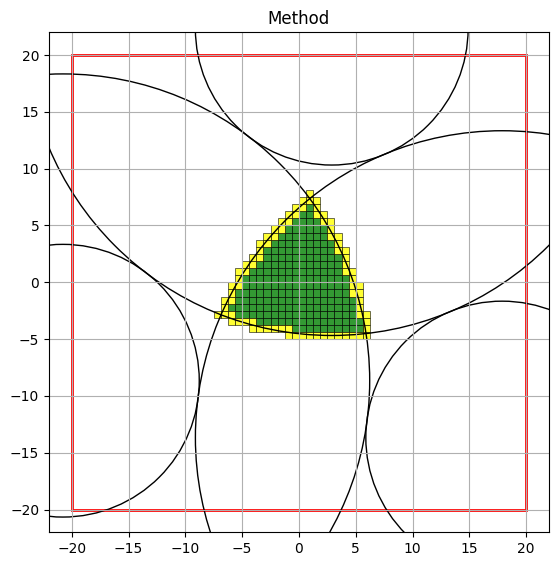

In [117]:
ini_box = [u_x, u_y]
uni_plotter(inside_boxes, border_boxes, size = 2, ini_box = ini_box, title="Method", 
            plot_area=plot_area_3RPR, pa_params = pa_params)